In [2]:
from xgboost import XGBClassifier
import pandas as pd  
import numpy as np  
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


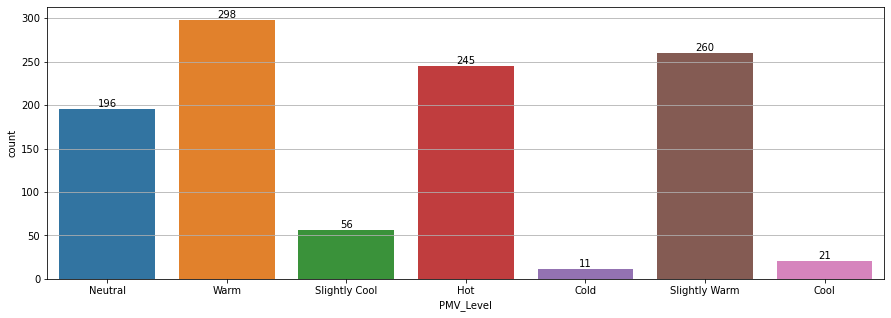

In [4]:
# Adding Values to Seaborn Count Plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='PMV_Level', )

for label in ax.containers:
    ax.bar_label(label)
    
plt.show()


In [5]:
df['PMV_Level'].value_counts()

Warm             298
Slightly Warm    260
Hot              245
Neutral          196
Slightly Cool     56
Cool              21
Cold              11
Name: PMV_Level, dtype: int64

In [6]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

Male      663
Female    424
Name: Gender, dtype: int64
18-25    1009
26-30      78
Name: Age, dtype: int64
3    565
2    423
4     99
Name: Study_Level, dtype: int64
601     52
902     48
607     47
801     44
501     44
620     44
621     43
707     42
612     41
608     40
603     40
903     38
504     38
904     37
804     37
924     35
520     34
901     34
1003    34
604     33
803     30
905     29
1004    29
913     29
802     28
805     27
823     26
907     24
908     21
909     21
1002    18
Name: Room_No, dtype: int64
N-W    459
S-E    445
S-W    125
N-E     58
Name: Room_Orientation, dtype: int64
24    202
26    182
25    165
23    134
21    112
18     74
28     44
15     42
16     41
22     37
13     33
10     21
Name: No_Lights, dtype: int64
12    221
9     187
14    162
10    133
13    132
5      66
15     44
8      44
11     41
6      29
16     28
Name: No_Fans, dtype: int64
3    573
5    288
4    147
2     79
Name: No_Windows, dtype: int64
2    789
1    298
Name: No_Do

<AxesSubplot:>

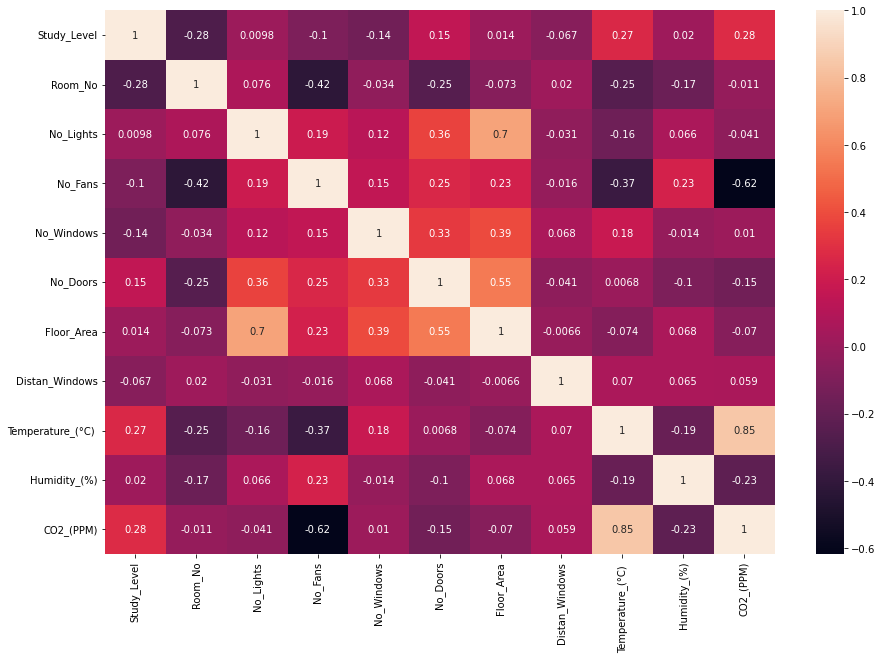

In [7]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [9]:
df.head()  

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [10]:
#Filter any variables with low variance (close to zero) to avoid overfitting
df.var()

Gender                  0.238133
Age                     0.066669
Study_Level             0.391737
Room_No             25085.079254
Room_Orientation        0.711123
No_Lights              15.831979
No_Fans                 7.346655
No_Windows              0.917549
No_Doors                0.199175
Floor_Area            363.316001
Distan_Windows          1.924690
Temperature_(°C)        2.851991
Humidity_(%)           29.145839
CO2_(PPM)              15.096677
PMV_Level               3.561772
Lighting_Level          3.038354
dtype: float64

In [11]:
inputs = df.drop(['PMV_Level',], axis='columns')

In [12]:
target = df['PMV_Level']

In [13]:
inputs

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [14]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [15]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [17]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [18]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [19]:
y.value_counts()

1    298
2    298
3    298
4    298
5    298
6    298
0    286
Name: PMV_Level, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [21]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

rfc = xgb.XGBClassifier(base_score=0, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', 
       reg_alpha=0, reg_lambda=1,
       silent=None, subsample=1,verbosity=1)
print(rfc)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

XGBClassifier(base_score=0, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy score: 0.5975903614457831


In [22]:
rfc.score(X_train, y_train)

0.8438818565400844

In [23]:
y_predict = rfc.predict(X_test)

In [24]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 4.05
RMSE: 2.01


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm)


Accuracy: 0.5975903614457831
Confusion matrix:
[[22 11  8  4  2  8  3]
 [12 20  6 11  1  9  3]
 [ 3  4 49  0  1  0  2]
 [ 4 10  3 35  0  6  0]
 [ 0  0  1  1 55  0  0]
 [16 15  6  9  0 17  1]
 [ 1  0  2  1  0  3 50]]


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38        58
           1       0.33      0.32      0.33        62
           2       0.65      0.83      0.73        59
           3       0.57      0.60      0.59        58
           4       0.93      0.96      0.95        57
           5       0.40      0.27      0.32        64
           6       0.85      0.88      0.86        57

    accuracy                           0.60       415
   macro avg       0.59      0.61      0.59       415
weighted avg       0.58      0.60      0.59       415



In [27]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [28]:
y_predict = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

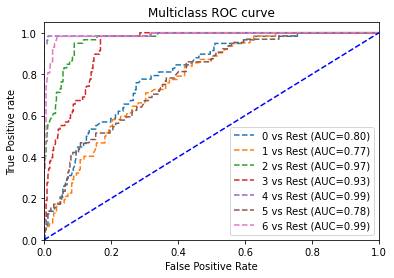

In [29]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [30]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfc.predict_proba(X_test))
logloss

1.0822579084140156

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

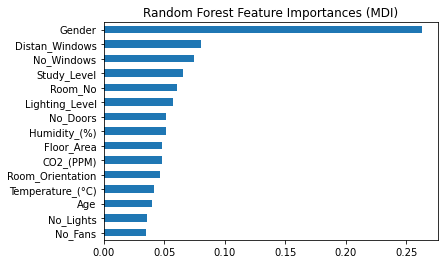

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')

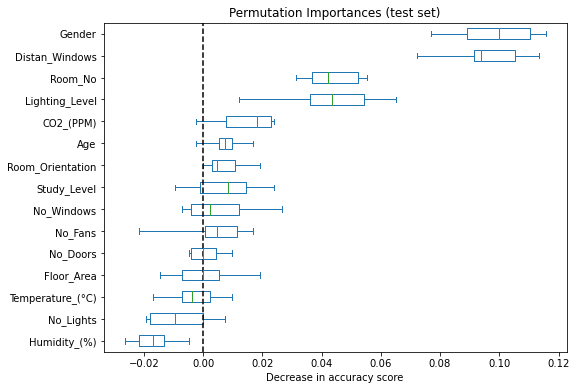

<Figure size 1800x1080 with 0 Axes>

In [32]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

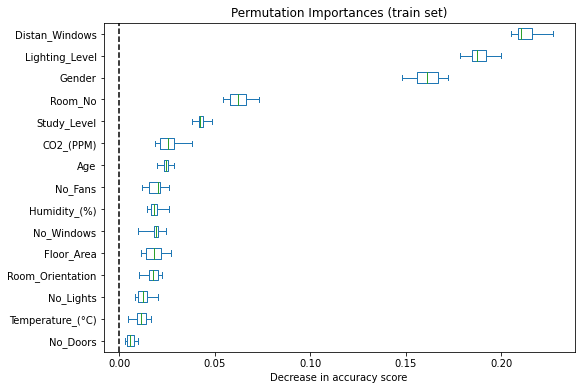

<Figure size 1800x1080 with 0 Axes>

In [33]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [34]:
import numpy as np
import pandas as pd

In [35]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


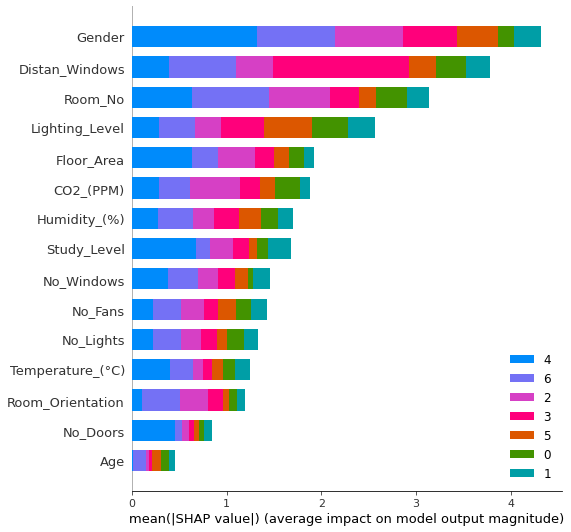

In [36]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

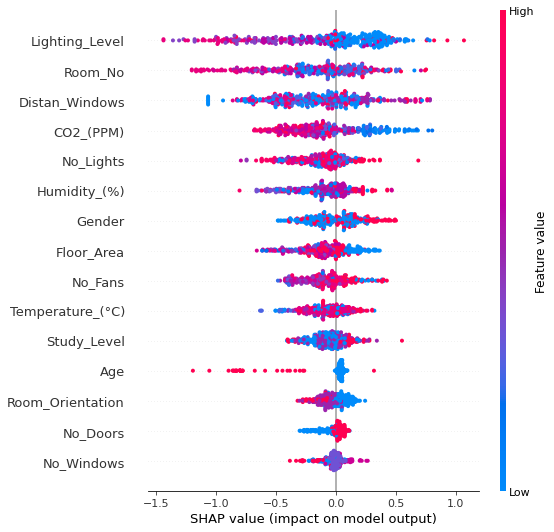

In [37]:
shap.summary_plot(shap_values[0], X_test)

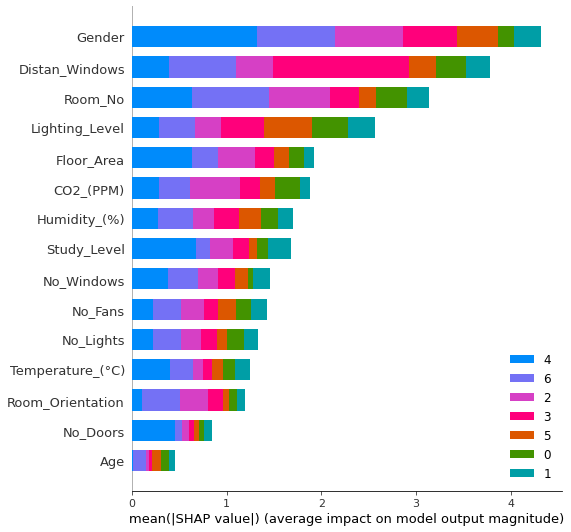

In [38]:
shap.summary_plot(shap_values, X_train, class_names=rfc.classes_ )

In [39]:
#importing random forest classifier and recursive feature elemenation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    rfc = RFE(xgb.XGBClassifier(verbosity=1), n_features_to_select= i)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(y_test, y_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.2289156626506024

Number of Selected features:  2
accuracy score: 0.36626506024096384

Number of Selected features:  3
accuracy score: 0.45542168674698796

Number of Selected features:  4
accuracy score: 0.5156626506024097

Number of Selected features:  5
accuracy score: 0.5277108433734939

Number of Selected features:  6
accuracy score: 0.5349397590361445

Number of Selected features:  7
accuracy score: 0.5253012048192771

Number of Selected features:  8
accuracy score: 0.5421686746987951

Number of Selected features:  9
accuracy score: 0.5469879518072289

Number of Selected features:  10
accuracy score: 0.5397590361445783

Number of Selected features:  11
accuracy score: 0.5445783132530121

Number of Selected features:  12
accuracy score: 0.6024096385542169

Number of Selected features:  13
accuracy score: 0.6

Number of Selected features:  14
accuracy score: 0.6072289156626506



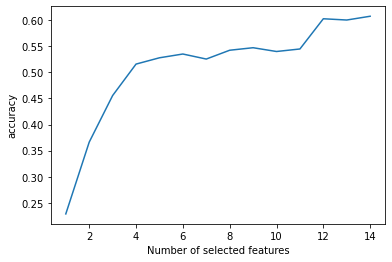

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 15),
    scores,
)
plt.show()

In [41]:
rfc.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [42]:
features = X_train.columns[rfc.get_support()]
features

Index(['Gender', 'Study_Level', 'Room_No', 'Room_Orientation', 'No_Lights',
       'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows',
       'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level'],
      dtype='object')

In [43]:
excluded_feature = list(set(X_train.columns) - set(features))
print(excluded_feature)

['Age']


In [44]:
#drop features from X
X = X.drop(['Age'], axis=1)

In [45]:
#updating train & test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = xgb.XGBClassifier(verbosity=1)
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X_train,y_train)

print(f"Optimal number of features: {rfe.n_features_}")

Optimal number of features: 14


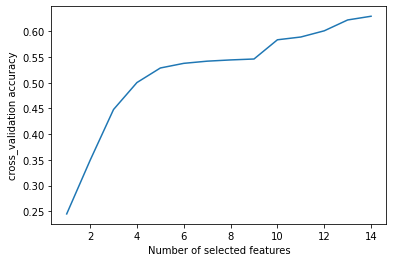

In [47]:
n_scores = len(rfe.cv_results_)
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("cross_validation accuracy")
plt.plot(
    range (1,len (rfe.cv_results_["mean_test_score"])+1),
    rfe.cv_results_["mean_test_score"],)

plt.show()

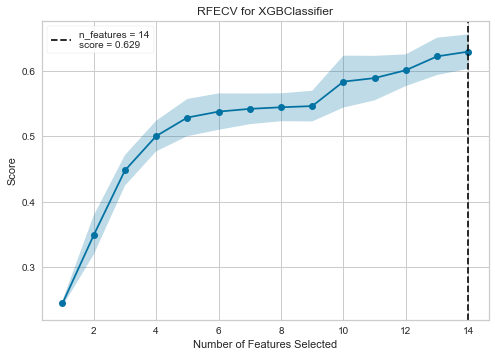

<AxesSubplot:title={'center':'RFECV for XGBClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [48]:
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear DT classifier
visualizer = RFECV(estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,)

visualizer.fit(X_train,y_train)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

In [49]:
#Max_Depth
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

for depth in [1,2,3,4,5,6,7,8,10, 15,16, 17, 18,19,20,21,22,23, 50]:
    rfc = XGBClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    print(f'Max_Depth: {depth}. Score: {rfc.score(X_train, y_train)}')

Max_Depth: 1. Score: 0.6039783001808319
Max_Depth: 2. Score: 0.70042194092827
Max_Depth: 3. Score: 0.7655213984327909
Max_Depth: 4. Score: 0.8161543098251959
Max_Depth: 5. Score: 0.8378541289933695
Max_Depth: 6. Score: 0.840867992766727
Max_Depth: 7. Score: 0.8414707655213984
Max_Depth: 8. Score: 0.8414707655213984
Max_Depth: 10. Score: 0.8414707655213984
Max_Depth: 15. Score: 0.8414707655213984
Max_Depth: 16. Score: 0.8414707655213984
Max_Depth: 17. Score: 0.8414707655213984
Max_Depth: 18. Score: 0.8414707655213984
Max_Depth: 19. Score: 0.8414707655213984
Max_Depth: 20. Score: 0.8414707655213984
Max_Depth: 21. Score: 0.8414707655213984
Max_Depth: 22. Score: 0.8414707655213984
Max_Depth: 23. Score: 0.8414707655213984
Max_Depth: 50. Score: 0.8414707655213984


In [50]:
#learning_rate
for rate in [0.9,0.8, 0.7, 0.6, 0.5,0.4,0.3, 0.2, 0.1,0.01]:
    rfc = XGBClassifier(learning_rate=rate)
    rfc.fit(X_train, y_train)
    print(f'learning_rate: {rate}. Score: {rfc.score(X_train, y_train)}')

learning_rate: 0.9. Score: 0.8414707655213984
learning_rate: 0.8. Score: 0.8414707655213984
learning_rate: 0.7. Score: 0.8414707655213984
learning_rate: 0.6. Score: 0.8414707655213984
learning_rate: 0.5. Score: 0.8414707655213984
learning_rate: 0.4. Score: 0.8414707655213984
learning_rate: 0.3. Score: 0.840867992766727
learning_rate: 0.2. Score: 0.8390596745027125
learning_rate: 0.1. Score: 0.8203737191078964
learning_rate: 0.01. Score: 0.7046413502109705


In [51]:
#min_child_weight

for min_child_weight in [0,1,2,3,4,5,6]:
    rfc = XGBClassifier(min_child_weight=min_child_weight)
    rfc.fit(X_train, y_train)
    print(f'min_child_weight: {min_child_weight}. Score: {rfc.score(X_train, y_train)}')

min_child_weight: 0. Score: 0.8414707655213984
min_child_weight: 1. Score: 0.840867992766727
min_child_weight: 2. Score: 0.840867992766727
min_child_weight: 3. Score: 0.8390596745027125
min_child_weight: 4. Score: 0.8342374924653405
min_child_weight: 5. Score: 0.8282097649186256
min_child_weight: 6. Score: 0.8257986738999398


In [52]:
#gamma

for gamma in [0,1,2,3,4,5,6,7,8,10,11,12,15,20,50]:
    rfc = XGBClassifier(gamma=gamma)
    rfc.fit(X_train, y_train)
    print(f'gamma: {gamma}. Score: {rfc.score(X_train, y_train)}')

gamma: 0. Score: 0.840867992766727
gamma: 1. Score: 0.7721518987341772
gamma: 2. Score: 0.7317661241711875
gamma: 3. Score: 0.7106690777576854
gamma: 4. Score: 0.6871609403254972
gamma: 5. Score: 0.6612417118746232
gamma: 6. Score: 0.6552139843279083
gamma: 7. Score: 0.6395418927064497
gamma: 8. Score: 0.6317058468957203
gamma: 10. Score: 0.6015672091621459
gamma: 11. Score: 0.5949367088607594
gamma: 12. Score: 0.5810729355033153
gamma: 15. Score: 0.5666063893911996
gamma: 20. Score: 0.5455093429776974
gamma: 50. Score: 0.48884870403857744


In [53]:
#max_delta_step

for max_delta_step in [0,1,2,3,4,]:
    rfc = XGBClassifier(max_delta_step=max_delta_step)
    rfc.fit(X_train, y_train)
    print(f'max_delta_step: {max_delta_step}. Score: {rfc.score(X_train, y_train)}'),

max_delta_step: 0. Score: 0.840867992766727
max_delta_step: 1. Score: 0.8402652200120555
max_delta_step: 2. Score: 0.8414707655213984
max_delta_step: 3. Score: 0.840867992766727
max_delta_step: 4. Score: 0.840867992766727


In [54]:
#subsample

for subsample in [0.1,0.2,0.3,0.4, 0.5, 1]:
    rfc = XGBClassifier(subsample=subsample)
    rfc.fit(X_train, y_train)
    print(f'subsample: {subsample}. Score: {rfc.score(X_train, y_train)}'),

subsample: 0.1. Score: 0.7396021699819169
subsample: 0.2. Score: 0.7872212176009644
subsample: 0.3. Score: 0.8191681735985533
subsample: 0.4. Score: 0.8300180831826401
subsample: 0.5. Score: 0.8354430379746836
subsample: 1. Score: 0.840867992766727


In [55]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

rfc = xgb.XGBClassifier(base_score=0, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', 
       reg_alpha=0, reg_lambda=1,
       silent=None, subsample=1,verbosity=1)
print(rfc)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

XGBClassifier(base_score=0, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy score: 0.6


In [56]:
from xgboost import XGBClassifier
from xgboost import plot_tree

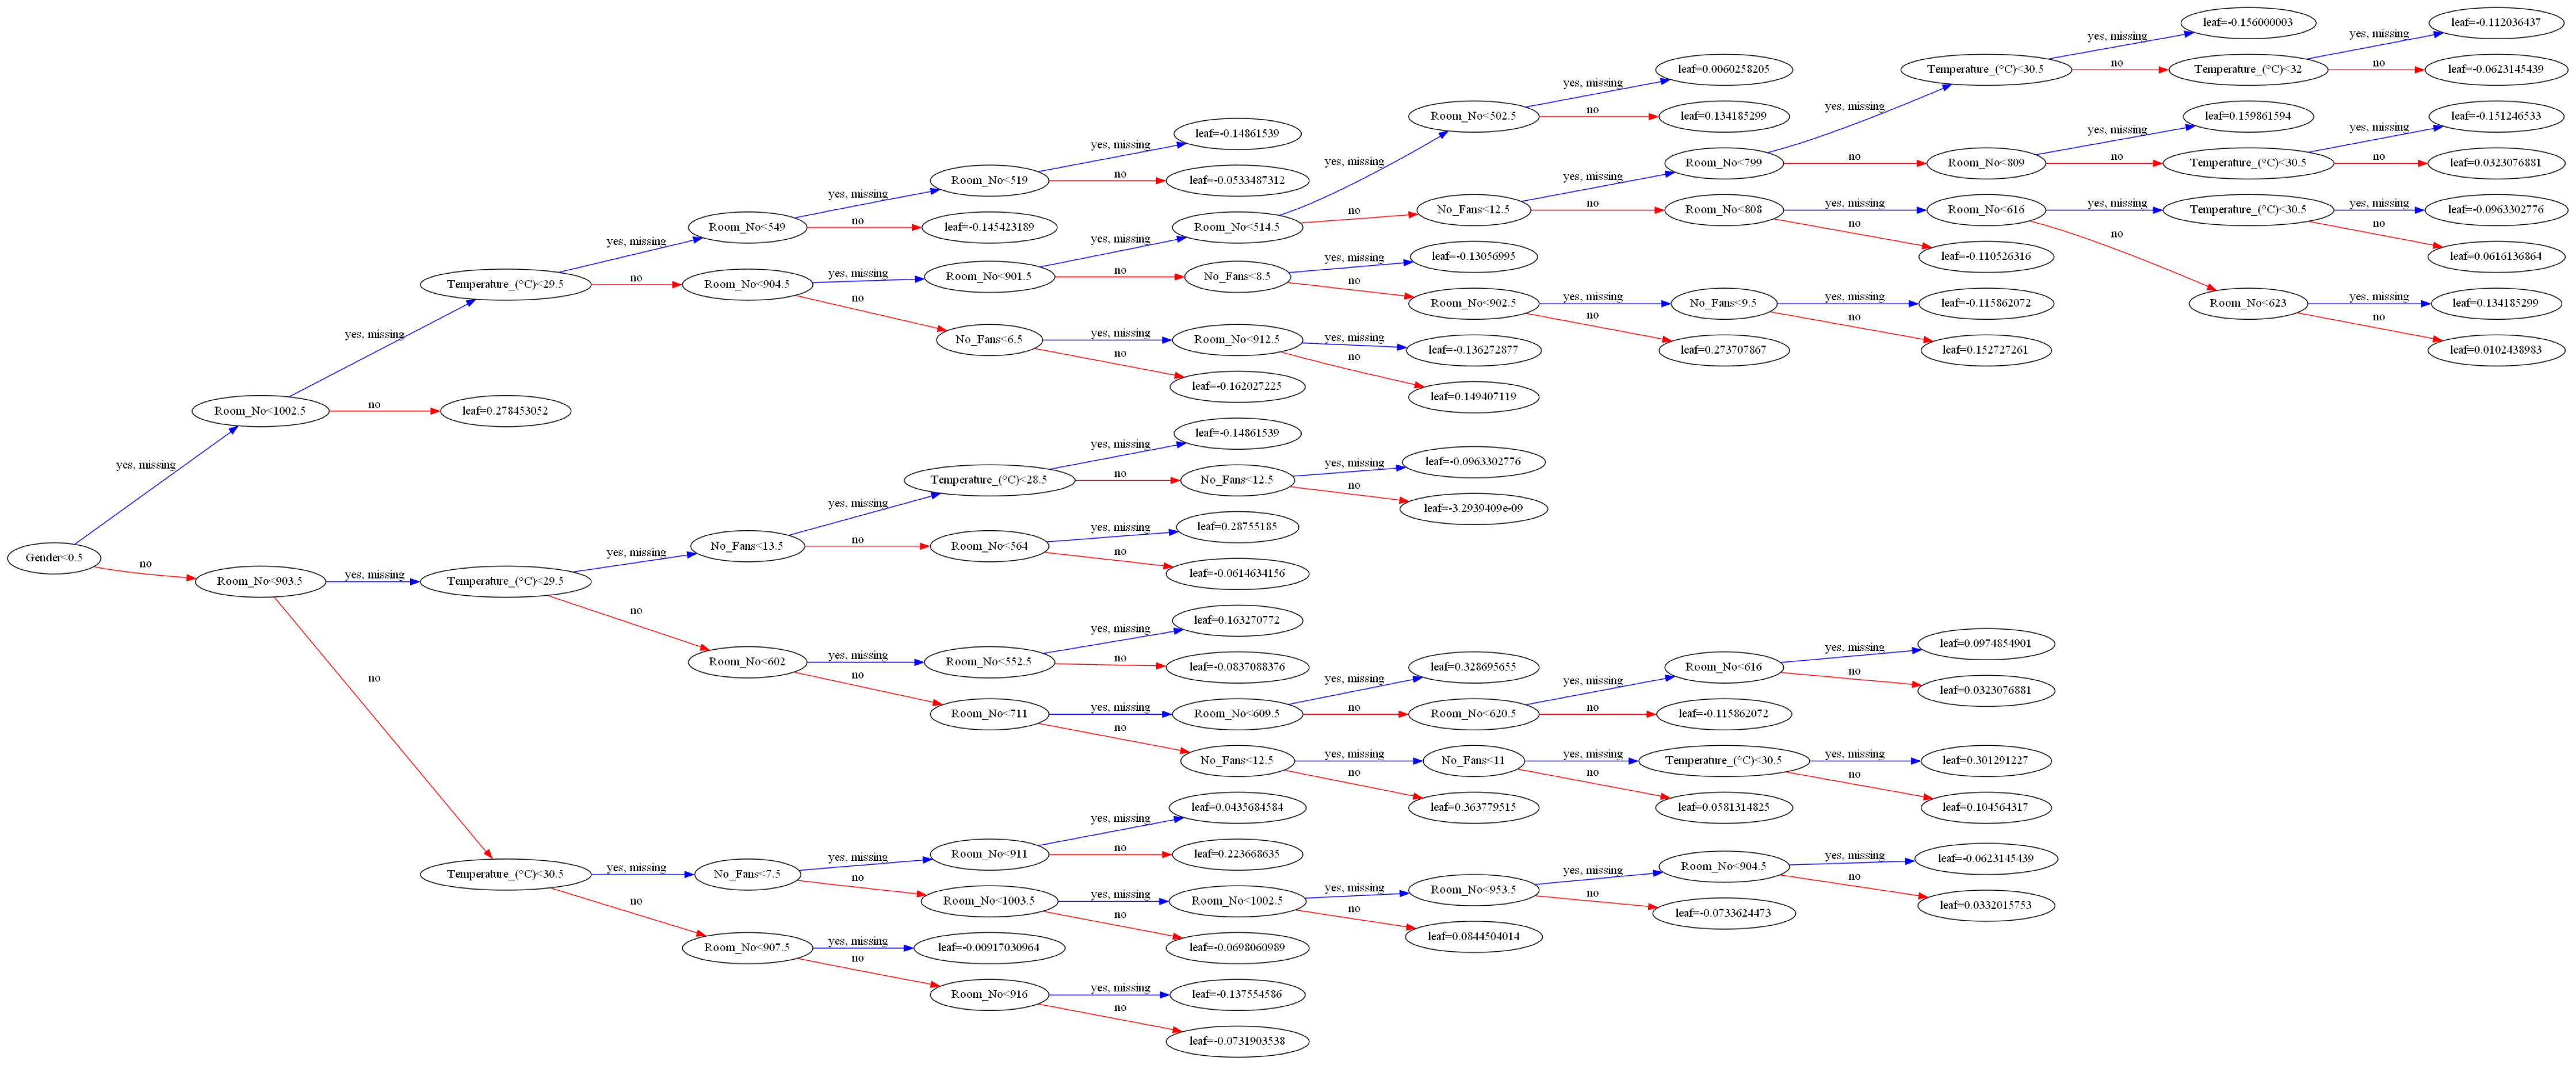

In [59]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,120
plot_tree(rfc, num_trees=1,rankdir='LR')
fig = plt.gcf()